Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [n]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 6 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


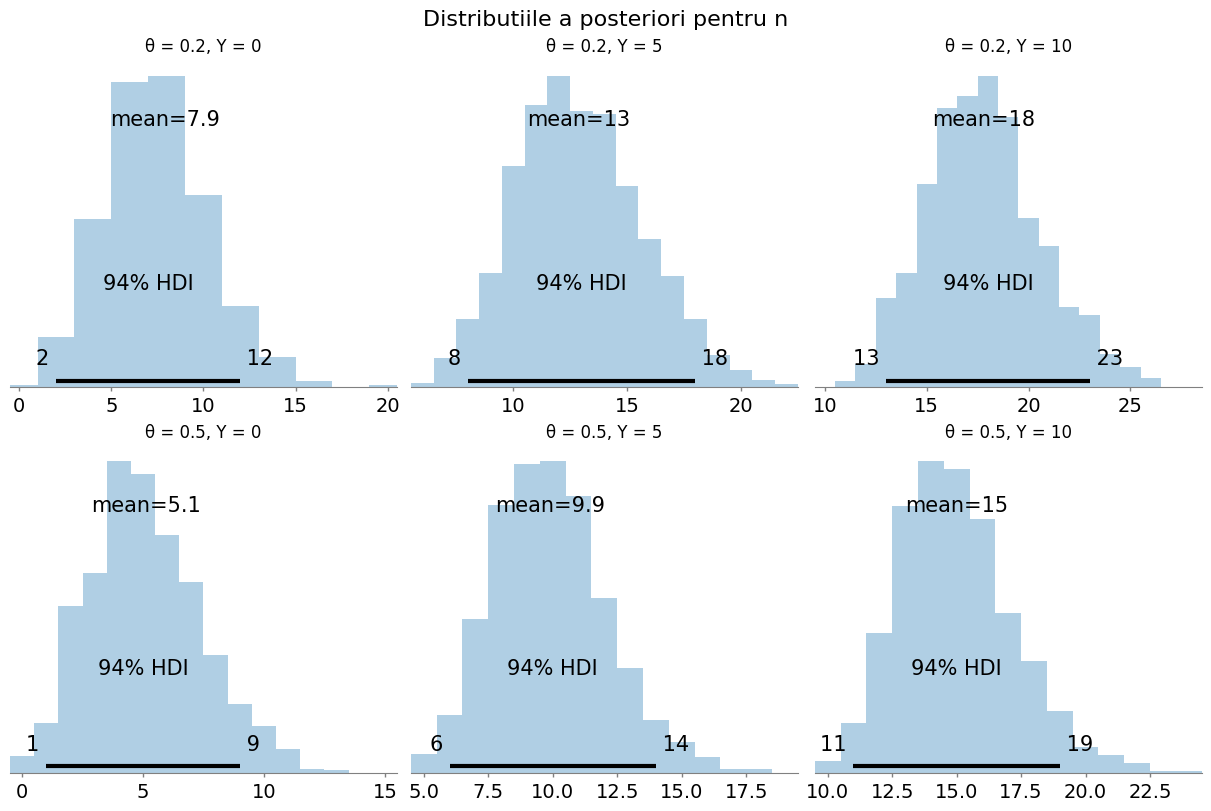

In [ ]:
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

values_y = [0, 5, 10] #nr clienti
values_theta = [0.2, 0.5]

posteriors = []

for theta in values_theta:
    for y in values_y:
        with pm.Model() as model:
            n = pm.Poisson("n", mu=10) 
            Y = pm.Binomial("Y", n=n, p=theta, observed=y)
            trace = pm.sample(2000, tune=1000, return_inferencedata=True, chains=2, cores=2)
            posteriors.append((theta, y, trace))

fig, axes = plt.subplots(len(values_theta), len(values_y), figsize=(12, 8), constrained_layout=True)

for i, theta in enumerate(values_theta):
    for j, y in enumerate(values_y):
        ax = axes[i, j]
        az.plot_posterior(posteriors[i * len(values_y) + j][2], var_names=["n"], ax=ax)
        ax.set_title(f"θ = {theta}, Y = {y}")

plt.suptitle("Distributiile a posteriori pentru n", fontsize=16)
plt.show()
